File kelulusan_mahasiswa.csv berhasil dibuat!

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None

5 baris pertama:
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1

Missing value per kolom:
IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64

Jumlah data setelah hapus duplikat: 10


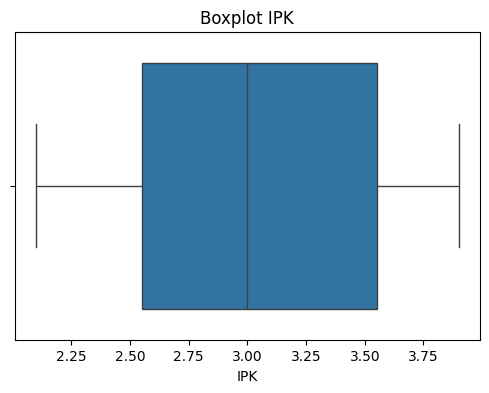


Statistik Deskriptif:
             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus
count  10.000000        10.00000          10.000000  10.000000
mean    3.030000         6.00000           6.400000   0.500000
std     0.639531         3.05505           3.306559   0.527046
min     2.100000         2.00000           2.000000   0.000000
25%     2.550000         4.00000           4.000000   0.000000
50%     3.000000         5.50000           6.000000   0.500000
75%     3.550000         7.75000           8.750000   1.000000
max     3.900000        12.00000          12.000000   1.000000


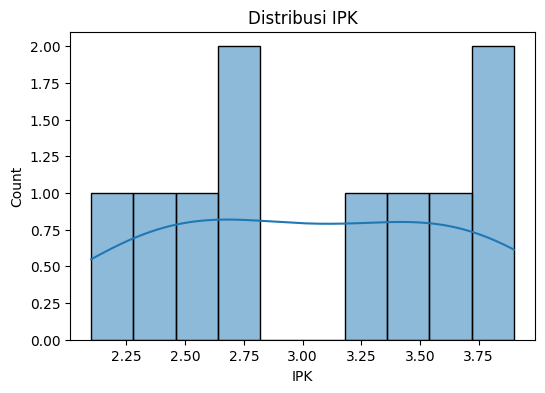

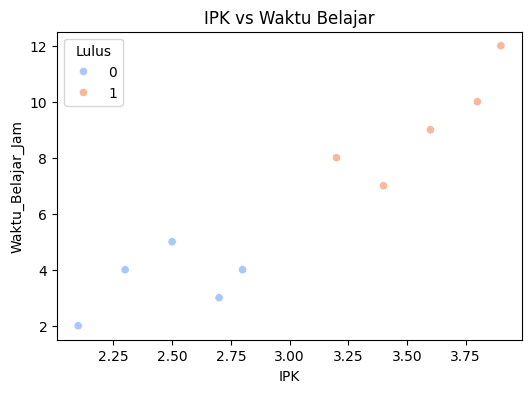

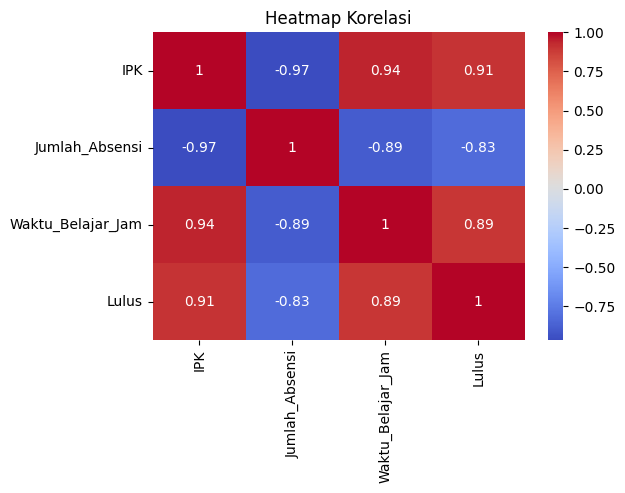


File processed_kelulusan.csv berhasil disimpan


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [2]:
# ===============================
# 📌 Lembar Kerja Pertemuan 4 — Data Preparation
# ===============================

# Step 0 — Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Supaya grafik tampil di notebook
%matplotlib inline

# Step 1 — Buat Dataset CSV (kalau belum ada)
data = {
    "IPK": [3.8, 2.5, 3.4, 2.1, 3.9, 2.8, 3.2, 2.7, 3.6, 2.3],
    "Jumlah_Absensi": [3, 8, 4, 12, 2, 6, 5, 7, 4, 9],
    "Waktu_Belajar_Jam": [10, 5, 7, 2, 12, 4, 8, 3, 9, 4],
    "Lulus": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
df.to_csv("kelulusan_mahasiswa.csv", index=False)
print("File kelulusan_mahasiswa.csv berhasil dibuat!\n")

# Step 2 — Baca Dataset CSV
df = pd.read_csv("kelulusan_mahasiswa.csv")
print("Info Dataset:")
print(df.info())
print("\n5 baris pertama:")
print(df.head())

# Step 3 — Cleaning

# 1️⃣ Cek missing value
print("\nMissing value per kolom:")
print(df.isnull().sum())

# 2️⃣ Hapus duplikat
df = df.drop_duplicates()
print("\nJumlah data setelah hapus duplikat:", len(df))

# 3️⃣ Identifikasi outlier dengan boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['IPK'])
plt.title("Boxplot IPK")
plt.show()

# Step 4 — Exploratory Data Analysis (EDA)

# 1️⃣ Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# 2️⃣ Histogram distribusi IPK
plt.figure(figsize=(6,4))
sns.histplot(df['IPK'], bins=10, kde=True)
plt.title("Distribusi IPK")
plt.show()

# 3️⃣ Scatterplot IPK vs Waktu Belajar
plt.figure(figsize=(6,4))
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus', palette='coolwarm')
plt.title("IPK vs Waktu Belajar")
plt.show()

# 4️⃣ Heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

# Step 5 — Feature Engineering

# Rasio absensi
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14

# Fitur turunan: IPK x Waktu Belajar
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']

# Simpan hasil preprocess
df.to_csv("processed_kelulusan.csv", index=False)
print("\nFile processed_kelulusan.csv berhasil disimpan")

# Step 6 — Splitting Dataset (Train / Validation / Test)
X = df.drop('Lulus', axis=1)
y = df['Lulus']

# Train 70%, sisa 30% untuk val + test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Bagi sisa 30% menjadi Validation 15% + Test 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("\nShape Dataset:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
